In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
np.random.seed(0)

In [4]:
# create random data where there are 5000 samples where 'groups(blobs) are centered around given co-ordinates
# with s.d of 0.9

X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2,3], [1,1]], cluster_std=0.9)


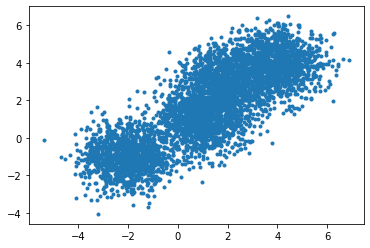

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker ='.')

In [6]:
# setting up k-means

# KMeans class has many parameters (see learning material), for this example use just 3:

# init: initilization method of the centroids where value will be 'k-means++'
# k-means++ selects initial cluster centres for k-mean clustering in a smart way to speed up convergence

# n_clusters -  the number of clusters and centroids to create (4 in this case)

# n_init - number of time the k -means algo will be run with different centroid seeds. (choose 12 here)

In [7]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [8]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [13]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.05264974, -1.00675103],
       [ 4.08378084,  4.01591447],
       [ 1.94888906,  3.02768073],
       [ 0.91539977,  0.8577787 ]])

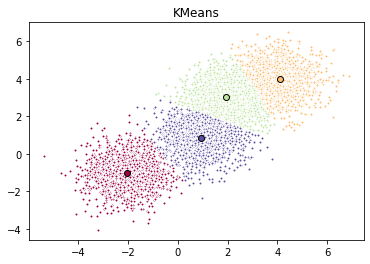

In [21]:
# plot visually

# intialise plot with spec. dimensions
fig = plt.figure(figsize=(6, 4))

# color map based on the number of labels there are
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create plot
ax = fig.add_subplot(1, 1, 1)

# for loop that plots the data points and centroids
# k will range from 0-3

for k, col in zip(range(len([[4,4], [-2,-1], [2,-3], [1,1]])), colors):
 
    # create list of all data points, where the daa points that are in the cluster (ex. cluder 0)
    # are labeled as true, else labeled as false
    my_members = (k_means_labels == k)
        
    # define centroid
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker ='.')
   
    # plot the centroids with spec. color but with darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize = 6)
    
    ax.set_title('KMeans')
    # remove axis ticks
    # ax.set_xticks(())
    # ax.set_yticks(())
    
